In [20]:
# get_ipython().magic(u'config IPCompleter.greedy=True')

In [56]:
import requests
import configparser
import json
import pandas as pd
from datetime import date, timedelta
from ocs_sample_library_preview import *

numberOfPreviewRows = 5 #this keeps the notebook short throughout the entries when displaying the output at each step

In [22]:
config = configparser.ConfigParser()
config.read('config.ini')

ocsClient = OCSClient(config.get('Access', 'ApiVersion'), config.get('Access', 'Tenant'), config.get('Access', 'Resource'), 
                        config.get('Credentials', 'ClientId'), config.get('Credentials', 'ClientSecret'))

namespaceId = config.get('Configurations', 'Namespace')
namespaceId

'Production'

In [57]:
#dateFrom = '2020-01-12'
#dateTo ='2020-01-23'
dateFrom = 'Mar 11, 2020, 12:00:00 AM' #str(date.today()-timedelta(days=10))
dateTo = 'Mar 12, 2020, 12:00:00 AM'# str(date.today()) #10 days of data
timeinterval = '00:01:00' #interpolate every minute

#dataviewId = Wind Turbine Data_NN, where NN is your specific student number (e.g. NN=01 in this example)
dataviewId= "Wind Turbine Data"

data, n, f = ocsClient.DataViews.getDataInterpolated(namespaceId, dataviewId, startIndex=dateFrom, endIndex=dateTo, 
                                                         interval=timeinterval, count=150000)

# output the data (but truncate it after a handful of rows)
data[:numberOfPreviewRows] 



[{'Timestamp': '2020-03-11T00:00:00Z',
  'Turbine': 'GE01',
  'Blade1 Actual': -0.543748,
  'Blade2 Actual': -0.5085606,
  'Blade3 Actual': -0.11147802,
  'Rotor Speed': 15.482932,
  'State': 16,
  'Active Power': 393.81445,
  'Nacelle Position': 304.809,
  'Air Temperature': 57.54779,
  'Wind Speed': 6.9476624},
 {'Timestamp': '2020-03-11T00:01:00Z',
  'Turbine': 'GE01',
  'Blade1 Actual': -0.54135567,
  'Blade2 Actual': -0.5062879,
  'Blade3 Actual': -0.0988387,
  'Rotor Speed': 14.812955,
  'State': 16,
  'Active Power': 405.43518,
  'Nacelle Position': 304.6422,
  'Air Temperature': 57.531895,
  'Wind Speed': 6.6366854},
 {'Timestamp': '2020-03-11T00:02:00Z',
  'Turbine': 'GE01',
  'Blade1 Actual': -0.5389633,
  'Blade2 Actual': -0.50401515,
  'Blade3 Actual': -0.08619938,
  'Rotor Speed': 13.750278,
  'State': 16,
  'Active Power': 307.92307,
  'Nacelle Position': 304.4754,
  'Air Temperature': 57.516,
  'Wind Speed': 6.979335},
 {'Timestamp': '2020-03-11T00:03:00Z',
  'Turbine': 

In [58]:
df = pd.DataFrame(data)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df[:numberOfPreviewRows]


Timestamp Turbine  Blade1 Actual  Blade2 Actual  \
0 2020-03-11 00:00:00+00:00    GE01      -0.543748      -0.508561   
1 2020-03-11 00:01:00+00:00    GE01      -0.541356      -0.506288   
2 2020-03-11 00:02:00+00:00    GE01      -0.538963      -0.504015   
3 2020-03-11 00:03:00+00:00    GE01      -0.536571      -0.501742   
4 2020-03-11 00:04:00+00:00    GE01      -0.534179      -0.499470   

   Blade3 Actual  Rotor Speed  State  Active Power  Nacelle Position  \
0      -0.111478    15.482932     16     393.81445         304.80900   
1      -0.098839    14.812955     16     405.43518         304.64220   
2      -0.086199    13.750278     16     307.92307         304.47540   
3      -0.073560    17.696032     16     618.70000         304.30860   
4      -0.060921    17.967062     16     641.00000         304.21494   

   Air Temperature  Wind Speed  
0        57.547790    6.947662  
1        57.531895    6.636685  
2        57.516000    6.979335  
3        57.500107    7.525977  
4        57.484210    8.931692

In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
#Renaming DataFrame column names to abbreviations, in order to display these column names clearly in a correlation plot 

df.rename(columns = {'Blade1 Actual':'BL1', 'Blade2 Actual':'BL2', 
                     'Blade3 Actual':'BL3', 'Rotor Speed':'RS','Turbine':'TS', 
                     'Active Power':'AP', 'Nacelle Position':'NP', 'Air Temperature':'AT',
                     'Wind Speed':'WS'}, inplace = True)

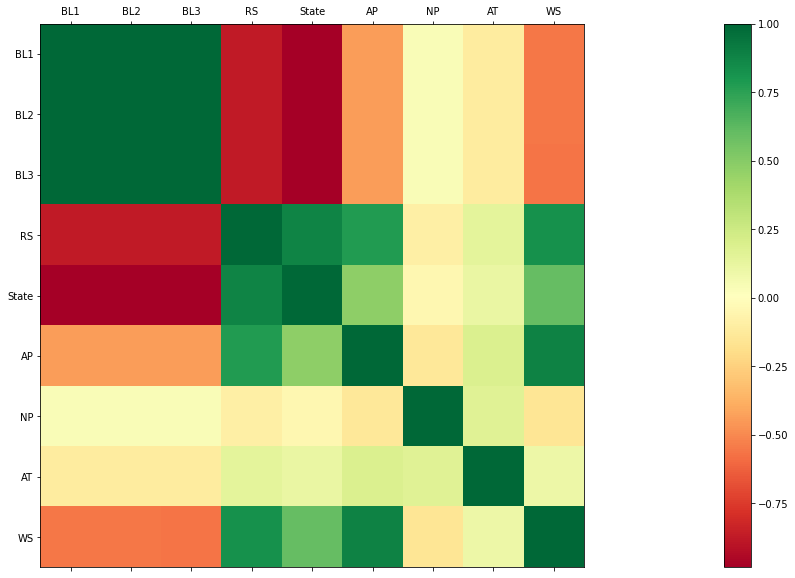

In [27]:
#Check the correlation between Active Power and the rest of the variables

#retrieve the correlation table
df_corr = df.corr()

#increase the size of the figure
fig = plt.figure(figsize=(50,10))
ax = fig.add_subplot(111)

#set the color pallete (Red, yellow, green)
cax = ax.matshow(df_corr, cmap=plt.cm.RdYlGn)
fig.colorbar(cax)

#configure the labels
labels = [c for c in df_corr.columns]

#make sure to show all the labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

#Setting labels for the x and y axes of the correlation plot
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show(block=False)

In [28]:
#Renaming DataFrame column names from abbreviations back to their original full names

df.rename(columns = {'BL1':'Blade1', 'BL2':'Blade2', 
                     'BL3':'Blade3', 'RS':'Rotor Speed Value','TS':'Turbine', 
                     'AP':'Active Power Value','NP':'Nacelle Position Value', 'AT':'Air Temperature Value',
                     'WS':'Wind Speed Value'}, inplace = True)

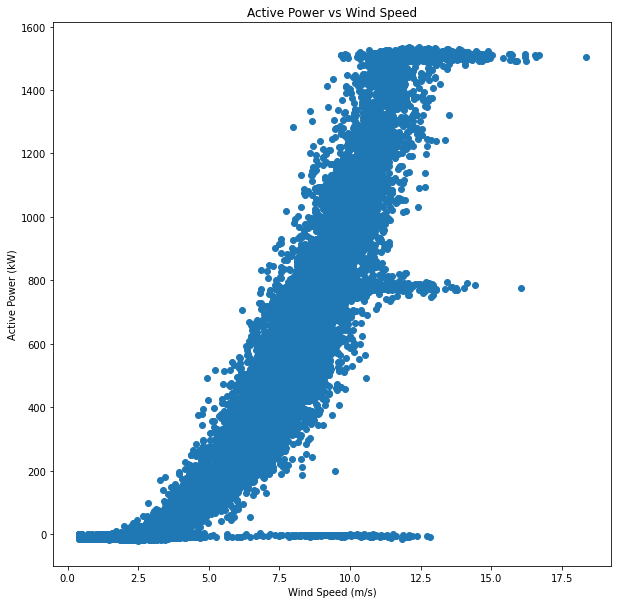

In [29]:
#Plotting Active Power versus Wind Speed

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df['Wind Speed Value'], df['Active Power Value'])
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Active Power (kW)')
ax.set_title('Active Power vs Wind Speed')

plt.show(block=False)

In [30]:

# df = df.dropna() #not needed
#Remove the GE05 turbine rows from the data frame because it has a lower rating relative to all the other turbines
filterOutGE05 = df['Turbine'] != "GE05"
df_Filter = df[filterOutGE05]

In [31]:
#Filter out negative & excessive Active Power Values
filterNegativeActivePower = (df_Filter['Active Power Value'] >= 0) 
df_Filter = df_Filter[filterNegativeActivePower]

In [32]:
#Remove the rows where we have a high wind speed and low active power in order to keep only the normal operating conditions
filterOutLowPowerHighWindSpeedData = (~((df_Filter['Wind Speed Value'] >  10) & (df_Filter['Active Power Value'] <600)))
df_Filter = df_Filter[filterOutLowPowerHighWindSpeedData]

In [33]:
#Keep only the rows which correspond to the "Load Operation" state
filterLoadOperationState = df_Filter['State'] == 16
df_Filter = df_Filter[filterLoadOperationState]

In [34]:
#Filter out high Wind Speeds (> 13 m/s) that do not change the Active Power results
filterOutHighWind = df_Filter['Wind Speed Value'] <13
df_Filter = df_Filter[filterOutHighWind]

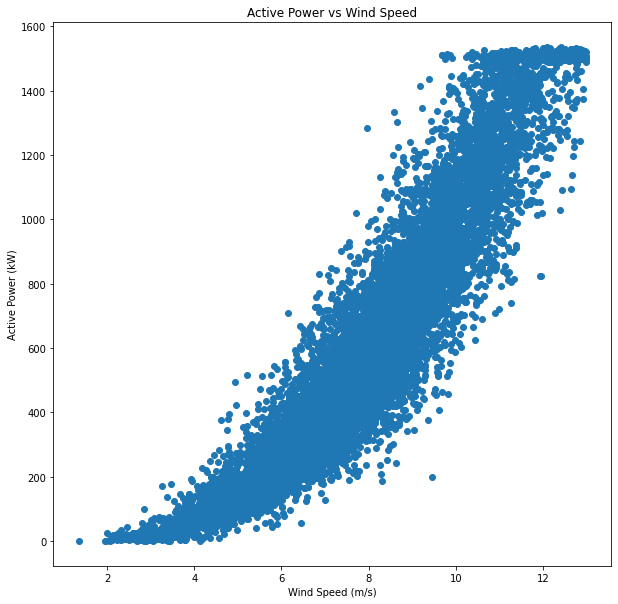

In [35]:
#Plotting Active Power versus Wind Speed - filtered data frame representing Normal Operating Conditions

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_Filter['Wind Speed Value'], df_Filter['Active Power Value'])
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Active Power (kW)')
ax.set_title('Active Power vs Wind Speed')

plt.show(block=False)

In [36]:
#Prepare the training & testing/scoring data sets, and split them randomly
from sklearn.model_selection import train_test_split
#define the target variable to be predicted
y = df_Filter['Active Power Value'].values
#split the dataset randomly into test and train sets
X_train, X_test, y_train, y_test = train_test_split(df_Filter[['Air Temperature Value', 'Wind Speed Value']].values, 
                                                    y, test_size=0.25, random_state=42)

In [37]:
#Use the Decision Tree Regression Machine Learning model from scikit-learn
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

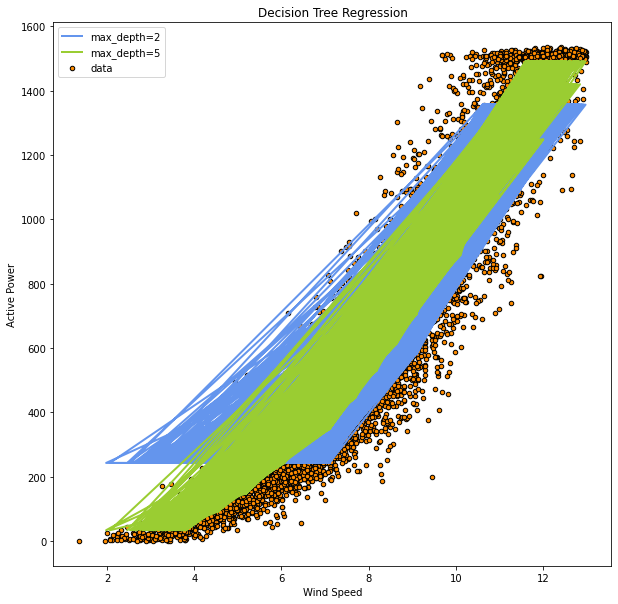

In [38]:
# Plot the results
plt.figure(figsize=(10,10))
plt.scatter(X_train[:,1], y_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test[:,1], y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test[:,1], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Wind Speed")
plt.ylabel("Active Power")
plt.title("Decision Tree Regression")
plt.legend()
plt.show(block=False)

In [39]:
#save the machine learning model to disk
import pickle
filename = 'WT_ActivePower_model.sav'
pickle.dump(regr_2, open(filename, 'wb'))

In [40]:
#Test the model with the scoring/testing data set
loaded_model = pickle.load(open(filename, 'rb'))
global result
result = loaded_model.score(X_test, y_test)
#print the model score
print(result)

0.9087426525813225


In [41]:
#Sample prediction
# define input
new_input = [[45, 6.6]] #Temp=45 F, Wind Speed = 6.6 m/s
# get prediction for new input
new_output = regr_2.predict(new_input)
print(new_output)

[348.57358041]


In [42]:
#Call the OpenWeather API to retrieve the forecasted air temperature and wind speed for Amarillo, TX for the next 5 days
import requests
url="https://api.openweathermap.org/data/2.5/forecast?q=Amarillo,US&APPID=5dac981ce33f41f61d8d1ea06ee89798"
responseWeatherForecast=requests.get(url)

In [46]:
responseWeatherForecast.json()

 [{'id': 600,
     'main': 'Snow',
     'description': 'light snow',
     'icon': '13n'}],
   'clouds': {'all': 95},
   'wind': {'speed': 11.41, 'deg': 349},
   'visibility': 2756,
   'pop': 0.36,
   'snow': {'3h': 0.14},
   'sys': {'pod': 'n'},
   'dt_txt': '2020-12-03 00:00:00'},
  {'dt': 1606964400,
   'main': {'temp': 272.4,
    'feels_like': 262.14,
    'temp_min': 272.13,
    'temp_max': 272.4,
    'pressure': 1028,
    'sea_level': 1028,
    'grnd_level': 896,
    'humidity': 91,
    'temp_kf': 0.27},
   'weather': [{'id': 600,
     'main': 'Snow',
     'description': 'light snow',
     'icon': '13n'}],
   'clouds': {'all': 97},
   'wind': {'speed': 11.42, 'deg': 348},
   'visibility': 5872,
   'pop': 0.43,
   'snow': {'3h': 0.52},
   'sys': {'pod': 'n'},
   'dt_txt': '2020-12-03 03:00:00'},
  {'dt': 1606975200,
   'main': {'temp': 272.01,
    'feels_like': 261.95,
    'temp_min': 271.92,
    'temp_max': 272.01,
    'pressure': 1029,
    'sea_level': 1029,
    'grnd_level': 897,

In [47]:
#Store the forecasted air temperature, wind speed and timestamp from the API json response in a pandas DataFrame

from decimal import Decimal
import datetime
TempArray = []
WindSpeedArray = []
TimestampArray = []

for val in responseWeatherForecast.json()["list"]:
    tempKelvin = val["main"]["temp"]
    tempF = round(((tempKelvin - 273.15) * (9/5)) + 32, 2)
    windSpeedMeterPerSec = round(val["wind"]["speed"], 2)
    np.array(TempArray.append(tempF))
    np.array(WindSpeedArray.append(windSpeedMeterPerSec))
    np.array(TimestampArray.append(datetime.datetime.strptime(val["dt_txt"], '%Y-%m-%d %H:%M:%S')))   
          
dfWeatherForecast = pd.DataFrame({'Timestamp':TimestampArray, 'Temp (F)':TempArray, 'Wind Speed (m/s)':WindSpeedArray})        
                              
dfWeatherForecast[:numberOfPreviewRows]

Timestamp  Temp (F)  Wind Speed (m/s)
0 2020-12-03 00:00:00     31.64             11.41
1 2020-12-03 03:00:00     30.65             11.42
2 2020-12-03 06:00:00     29.95             11.15
3 2020-12-03 09:00:00     29.07              9.70
4 2020-12-03 12:00:00     27.21              7.42

In [48]:
#Use the machine learning model developed previously to predict the Active Power and add the values to the existing Data Frame

import pickle
filename = 'WT_ActivePower_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

PredictedPowerArray=[]  

for index, row in dfWeatherForecast.iterrows():
    new_input = [[row['Temp (F)'], row['Wind Speed (m/s)']]]
    result = loaded_model.predict(new_input)
    np.array(PredictedPowerArray.append(result))
    
dfWeatherForecast['Predicted Active Power (kW)']=pd.DataFrame(PredictedPowerArray)

dfWeatherForecast[:numberOfPreviewRows]

Timestamp  Temp (F)  Wind Speed (m/s)  Predicted Active Power (kW)
0 2020-12-03 00:00:00     31.64             11.41                  1248.030453
1 2020-12-03 03:00:00     30.65             11.42                  1248.030453
2 2020-12-03 06:00:00     29.95             11.15                  1157.667784
3 2020-12-03 09:00:00     29.07              9.70                   888.910270
4 2020-12-03 12:00:00     27.21              7.42                   445.740888

In [49]:
#Create the type for air temp, wind speed, predicted active power, and time

typeId = "Wind_Turbine_Predictions_Time"

typeTempWindPowerTime = SdsType(
    id=typeId,
    description="A Time-Series indexed type with 3 values",
    sdsTypeCode=SdsTypeCode.Object)

#This type uses two data types, double and datetime
doubleType = SdsType()
doubleType.Id = "doubleType"
doubleType.SdsTypeCode = SdsTypeCode.Double

timeType = SdsType()
timeType.Id = "string"
timeType.SdsTypeCode = SdsTypeCode.DateTime

#This type has three double properties and one datetime
airTempProp = SdsTypeProperty()
airTempProp.Id = "Air_Temperature"
airTempProp.SdsType = doubleType

windSpeedProp = SdsTypeProperty()
windSpeedProp.Id = "Wind_Speed"
windSpeedProp.SdsType = doubleType

predActPowerProp = SdsTypeProperty()
predActPowerProp.Id = "Predicted_Active_Power"
predActPowerProp.SdsType = doubleType

timeProp = SdsTypeProperty()
timeProp.Id = "Timestamp"
timeProp.SdsType = timeType
timeProp.IsKey = True

#Add the properties to the type, and commit it to OCS 
typeTempWindPowerTime.Properties = [airTempProp, windSpeedProp, predActPowerProp, timeProp]

ocsClient.Types.getOrCreateType(namespaceId, typeTempWindPowerTime)


In [53]:
#Create the stream based on the previously created type

streamId = "WT_5dForecast_1"

predPowerStream = SdsStream(
    id=streamId,
    typeId=typeId,
    description="A stream for predicted active power data")

#Commit the stream to OCS
ocsClient.Streams.getOrCreateStream(namespaceId, predPowerStream)

In [51]:
#Save data back to prediction stream in OCS

values = []

for index, row in dfWeatherForecast.iterrows():
        values.append({"Air_Temperature": row["Temp (F)"], "Wind_Speed": row["Wind Speed (m/s)"], 
                       "Predicted_Active_Power": row["Predicted Active Power (kW)"], "Timestamp": 
                       row["Timestamp"].strftime('%Y-%m-%d %H:%M:%S') })

ocsClient.Streams.updateValues(namespaceId, streamId, json.dumps(values))
global finished
finished = True

In [52]:
def test_result():   
    global result

    assert result is not None
    
def test_finished():   
    global finished
    
    assert finished
